# Heart Attack Prediction

**Importing Libraries and Data**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline 

In [2]:
#os.getcwd()

In [39]:
df = pd.read_csv('/Users/ankushv/PycharmProjects/Heart-Attack-Prediction/Data/heart-attack.csv')
df.head()

Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope  Ca        Thal  Target  
0      3   0       fixed       0  
1      2   3      normal       1  
2      2   2  reversable       1  
3      3   0      normal       0  
4      1   0      normal       0

## Data Cleansing and Type

In [40]:
print(df.isnull().sum())

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
Target       0
dtype: int64


In [5]:
df = df.dropna()

In [6]:
df.describe()

Age         Sex      RestBP        Chol         Fbs     RestECG  \
count  301.000000  301.000000  301.000000  301.000000  301.000000  301.000000   
mean    54.451827    0.681063  131.714286  246.936877    0.146179    0.990033   
std      9.067258    0.466841   17.655729   51.859869    0.353874    0.994937   
min     29.000000    0.000000   94.000000  126.000000    0.000000    0.000000   
25%     48.000000    0.000000  120.000000  211.000000    0.000000    0.000000   
50%     56.000000    1.000000  130.000000  242.000000    0.000000    1.000000   
75%     61.000000    1.000000  140.000000  275.000000    0.000000    2.000000   
max     77.000000    1.000000  200.000000  564.000000    1.000000    2.000000   

            MaxHR       ExAng     Oldpeak       Slope         Ca      Target  
count  301.000000  301.000000  301.000000  301.000000  301.00000  301.000000  
mean   149.700997    0.325581    1.043189    1.601329    0.69103    0.458472  
std     22.860817    0.469372    1.163384    0.616872    0.94915    0.499102  
min     71.000000    0.000000    0.000000    1.000000    0.00000    0.000000  
25%    134.000000    0.000000    0.000000    1.000000    0.00000    0.000000  
50%    153.000000    0.000000    0.800000    2.000000    0.00000    0.000000  
75%    166.000000    1.000000    1.600000    2.000000    1.00000    1.000000  
max    202.000000    1.000000    6.200000    3.000000    3.00000    1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        301 non-null    int64  
 1   Sex        301 non-null    int64  
 2   ChestPain  301 non-null    object 
 3   RestBP     301 non-null    int64  
 4   Chol       301 non-null    int64  
 5   Fbs        301 non-null    int64  
 6   RestECG    301 non-null    int64  
 7   MaxHR      301 non-null    int64  
 8   ExAng      301 non-null    int64  
 9   Oldpeak    301 non-null    float64
 10  Slope      301 non-null    int64  
 11  Ca         301 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     301 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 35.3+ KB


## Data Visualisation


In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

In [9]:
import dtale
dtale.show(df, ignore_duplicate=True)


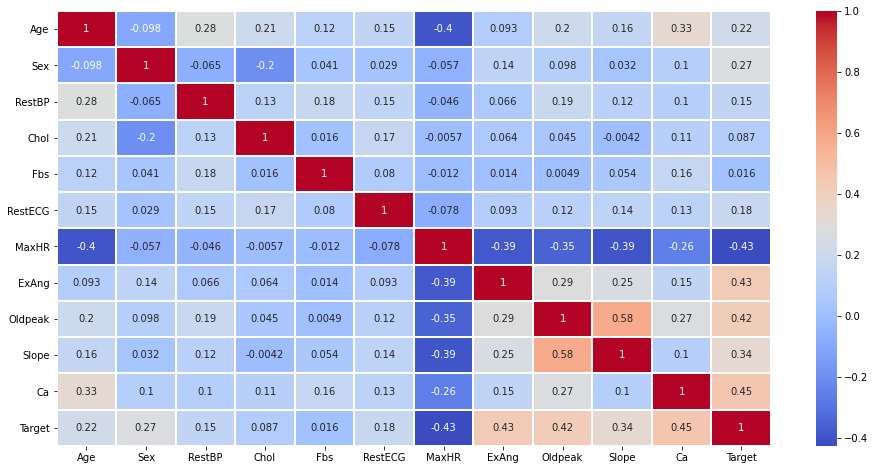

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True, linewidth = 1)
plt.show()

**AGE Analysis**

In [27]:
df['Age'].value_counts().head()

58    19
57    17
54    16
59    14
51    12
Name: Age, dtype: int64

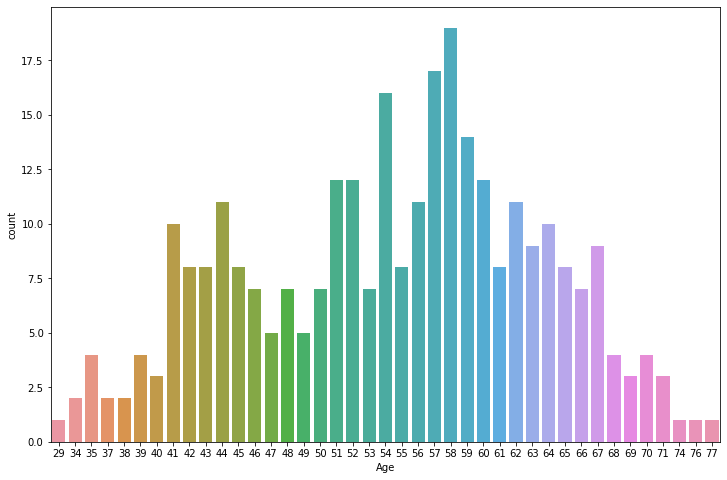

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x='Age', data=df)
plt.show()

/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



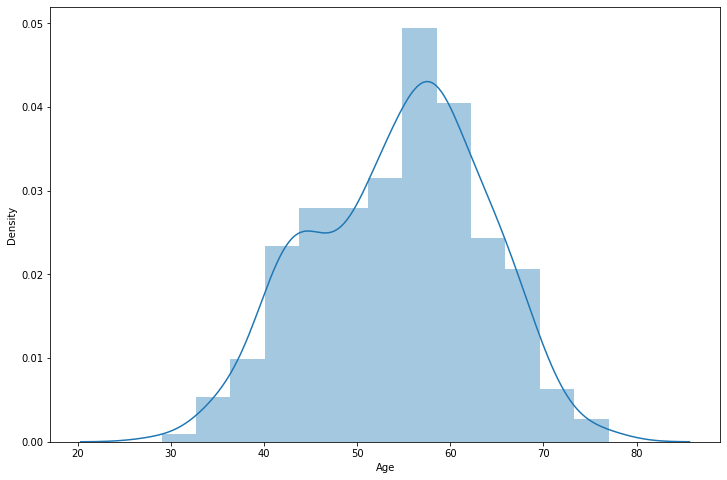

In [17]:
plt.figure(figsize=(12,8))
sns.distplot(df['Age'])
plt.show()


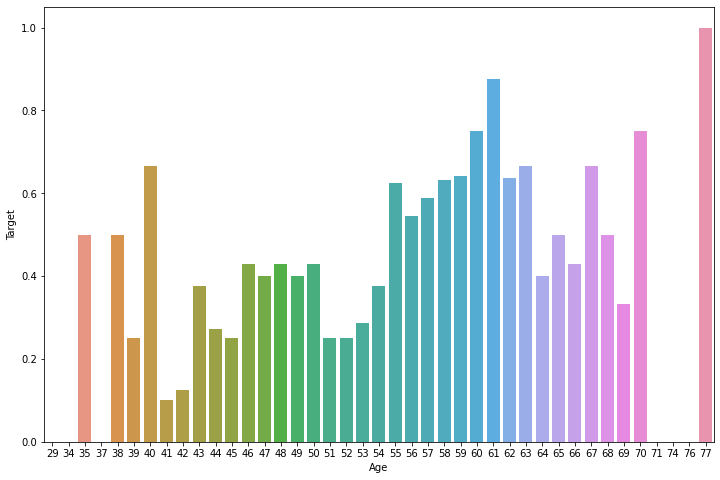

In [19]:
avg = df[["Age", "Target"]].groupby(['Age'], as_index=False).mean()
plt.figure(figsize=(12,8))
sns.barplot(x='Age', y='Target', data=avg)
plt.show()


In [47]:
def category(Age):
    if Age >= 29 and Age <= 35:
        return "Young Adults"
    elif Age >=35 and Age <= 50:
        return "Middle-aged Adults"
    elif Age >= 50 and Age <= 60:
        return "Senior Adults"
    elif Age >= 60:
        return "Retired"
    else:
        return "None"

In [48]:
df['Category'] = df['Age'].apply(category)

In [45]:
def gender(Sex):
    if Sex == 0:
        return "Female"
    else:
        return "Male"

In [46]:
df['Gender'] = df['Sex'].apply(gender)

**Cholestrol Analysis**


/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



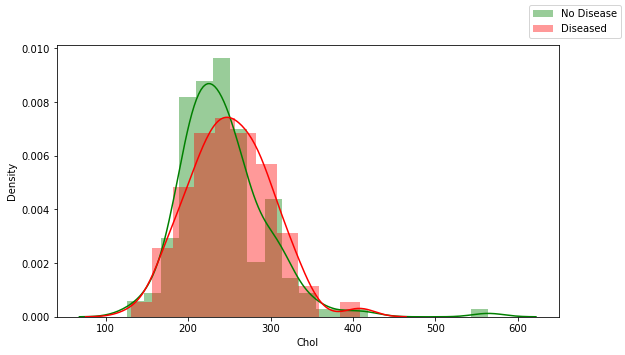

In [56]:
ax, figure = plt.subplots(figsize = [9,5])
sns.distplot(df[df['Target'] == 0].Chol, label="No Disease", color="g");
sns.distplot(df[df['Target'] == 1].Chol, label="Diseased", color="r");
ax.legend()
plt.show()

/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



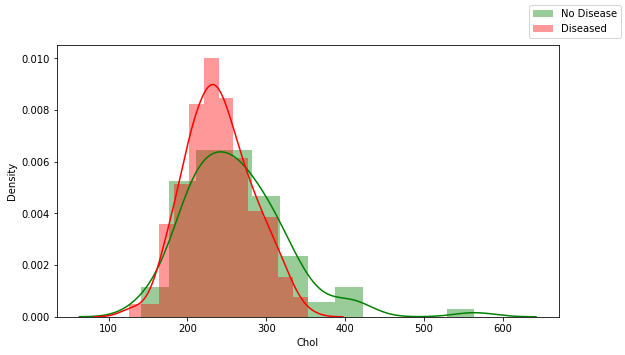

In [57]:
ax, figure = plt.subplots(figsize = [9,5])
sns.distplot(df[df['Gender'] == "Female"].Chol, label="No Disease", color="g");
sns.distplot(df[df['Gender'] == "Male"].Chol, label="Diseased", color="r");
ax.legend()
plt.show()

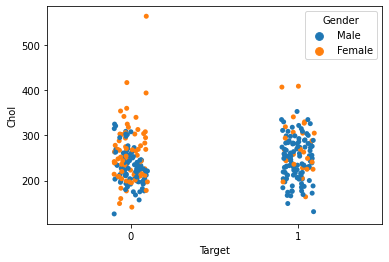

In [54]:
sns.stripplot(x="Target", y="Chol", hue="Gender",
              data = df, jitter=True)

<AxesSubplot:xlabel='Target', ylabel='Chol'>

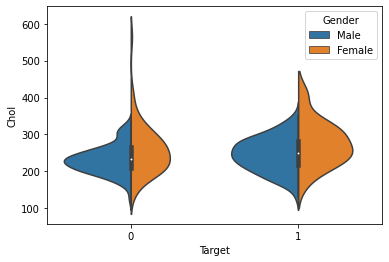

In [55]:
sns.violinplot(x="Target", y="Chol", hue="Gender",
               data=df, split=True)

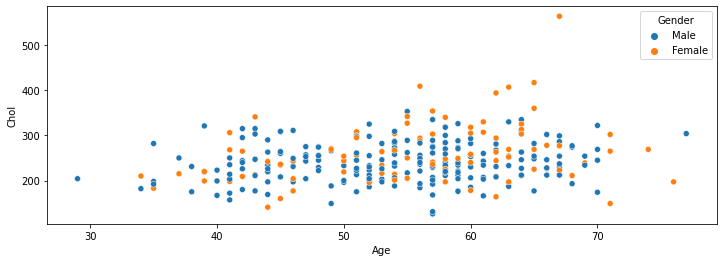

In [62]:
plt.figure(figsize=(12,4))
sns.scatterplot(x="Age", y="Chol", hue="Gender", data=df)
plt.show()

In [58]:
df.groupby('Age')['Chol'].mean()


Age
29    204.000000
34    196.000000
35    213.750000
37    232.500000
38    203.000000
39    239.750000
40    196.333333
41    220.700000
42    246.750000
43    256.750000
44    221.363636
45    247.375000
46    230.285714
47    246.400000
48    250.857143
49    228.600000
50    227.000000
51    258.666667
52    228.230769
53    233.500000
54    253.312500
55    280.625000
56    259.363636
57    238.529412
58    254.526316
59    239.857143
60    250.500000
61    243.750000
62    256.636364
63    258.222222
64    274.400000
65    279.000000
66    245.714286
67    286.777778
68    238.750000
69    242.333333
70    252.500000
71    238.666667
74    269.000000
76    197.000000
77    304.000000
Name: Chol, dtype: float64

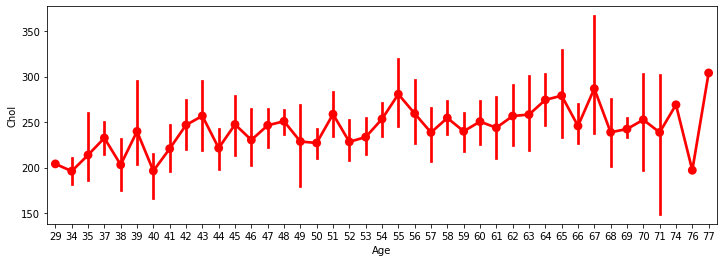

In [61]:
plt.figure(figsize=(12,4))
sns.pointplot(x="Age", y="Chol", data=df, color='r')
plt.show()

**ChestPain (CP) Analysis**

In [71]:
df['ChestPain'].value_counts()/len(df)*100

  ChestPainType  Percentage
0  Asymptomatic       47.52
1    Nonanginal       28.38
2    Nontypical       16.50
3       Typical        7.60


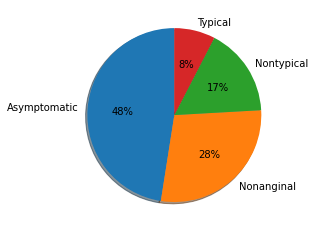

In [72]:
ChestPainType = ['Asymptomatic','Nonanginal','Nontypical','Typical']
Percentage = [47.52,28.38,16.50,7.6]

plt.figure(1, figsize=(8,4))
plt.pie(Percentage, labels=ChestPainType,
        autopct='%0.f%%', shadow=True, startangle=90)
plt.show()

<AxesSubplot:xlabel='ChestPain', ylabel='Chol'>

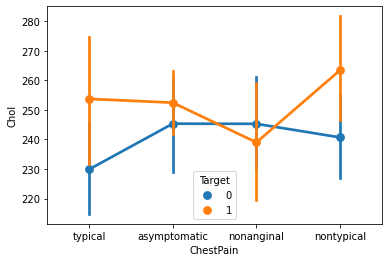

In [73]:
plt.figure(figsize=(12,4))
sns.pointplot(x = "ChestPain", y = "Chol", hue = "Target", data = df)
plt.show()

<AxesSubplot:xlabel='ChestPain', ylabel='Chol'>

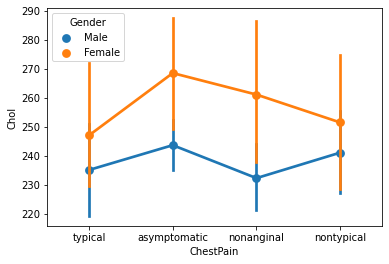

In [74]:
plt.figure(figsize=(12,4))
sns.pointplot(x = "ChestPain", y = "Chol", hue = "Gender", data = df)
plt.show()

**Resting Blood Pressure (RestBp) Analysis**

/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



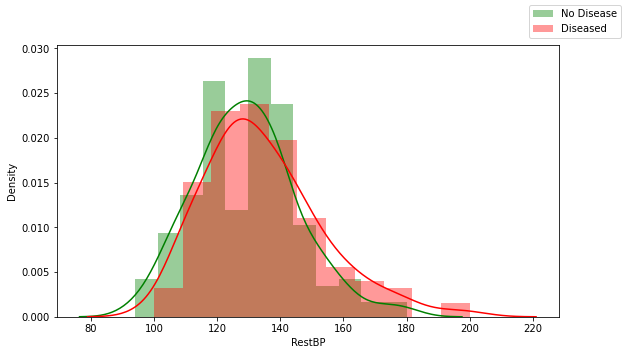

In [75]:
ax, figure = plt.subplots(figsize = [9,5])
sns.distplot(df[df['Target'] == 0].RestBP, label="No Disease", color="g");
sns.distplot(df[df['Target'] == 1].RestBP, label="Diseased", color="r");
ax.legend()
plt.show()

/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



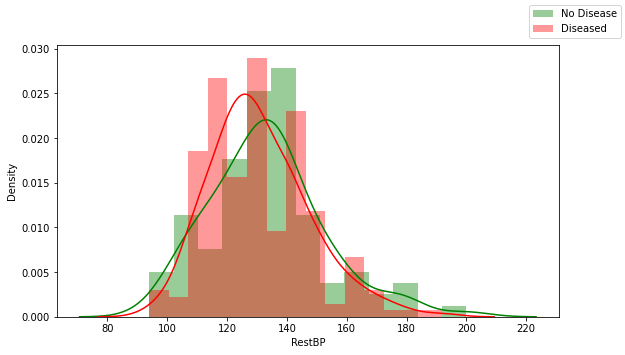

In [76]:
ax, figure = plt.subplots(figsize = [9,5])
sns.distplot(df[df['Gender'] == "Female"].RestBP, label="No Disease", color="g");
sns.distplot(df[df['Gender'] == "Male"].RestBP, label="Diseased", color="r");
ax.legend()
plt.show()

In [77]:
df.groupby('Age')['RestBP'].mean()

Age
29    130.000000
34    118.000000
35    126.500000
37    125.000000
38    129.000000
39    122.500000
40    134.000000
41    119.000000
42    127.000000
43    126.375000
44    120.727273
45    122.375000
46    128.000000
47    119.600000
48    124.285714
49    126.400000
50    130.428571
51    124.500000
52    130.692308
53    132.625000
54    129.125000
55    142.125000
56    134.636364
57    136.058824
58    127.947368
59    149.214286
60    133.916667
61    138.125000
62    134.545455
63    133.555556
64    138.800000
65    138.500000
66    146.571429
67    127.777778
68    140.500000
69    146.666667
70    147.750000
71    127.333333
74    120.000000
76    140.000000
77    125.000000
Name: RestBP, dtype: float64

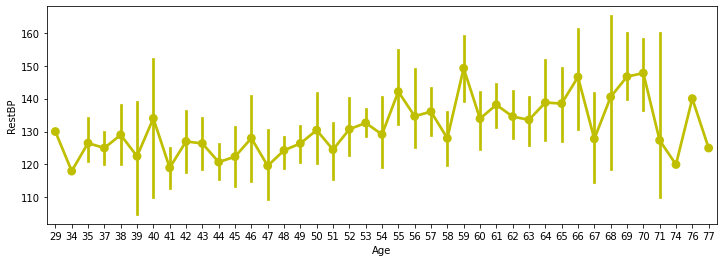

In [78]:
plt.figure(figsize=(12,4))
sns.pointplot(x="Age", y="RestBP", data=df, color='y')
plt.show()

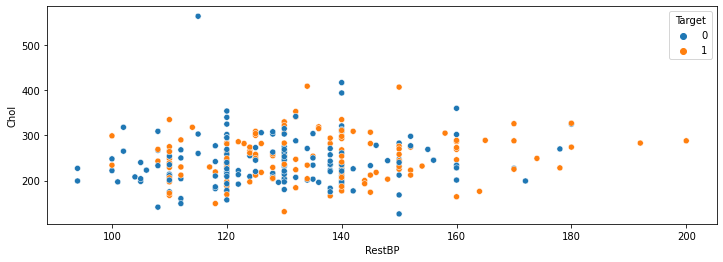

In [79]:
plt.figure(figsize=(12,4))
sns.scatterplot(x="RestBP", y="Chol", hue="Target", data=df)
plt.show()

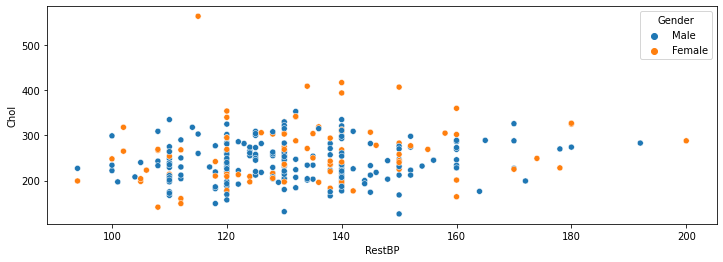

In [80]:
plt.figure(figsize=(12,4))
sns.scatterplot(x="RestBP", y="Chol", hue="Gender", data=df)
plt.show()

**Fasting Blood Sugar (Fbs) Analysis**

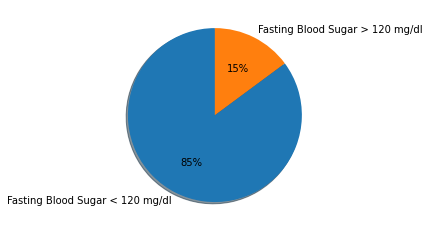

In [89]:
df['Fbs'].value_counts()/len(df)*100

Fbs = ['Fasting Blood Sugar < 120 mg/dl','Fasting Blood Sugar > 120 mg/dl']
Percentage = [85.14,14.86]

plt.figure(1, figsize=(8,4))
plt.pie(Percentage, labels=Fbs,
        autopct='%0.f%%', shadow=True, startangle=90)
plt.show()


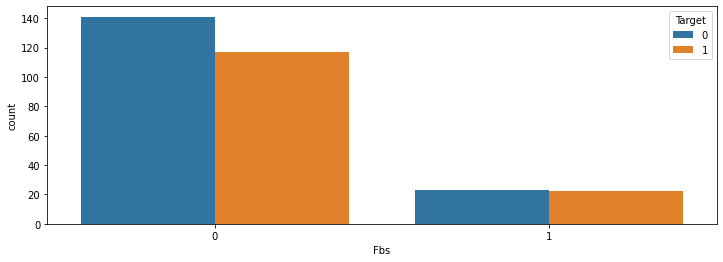

In [84]:
plt.figure(figsize=(12,4))
sns.countplot(x="Fbs", hue="Target", data=df)
plt.show()

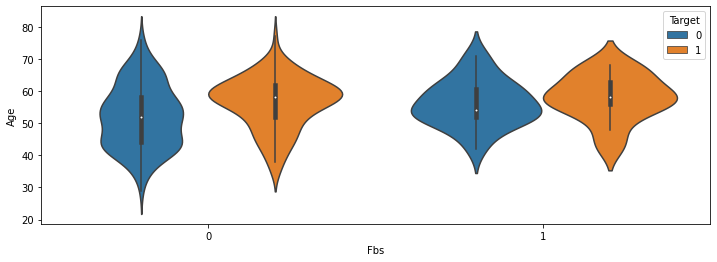

In [87]:
plt.figure(figsize=(12,4))
sns.violinplot(x="Fbs", y="Age", hue="Target", data=df)
plt.show()

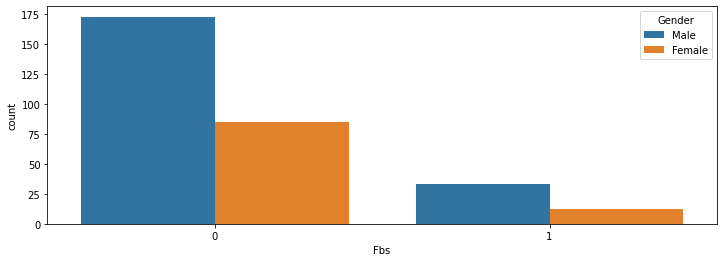

In [85]:
plt.figure(figsize=(12,4))
sns.countplot(x="Fbs", hue="Gender", data=df)
plt.show()

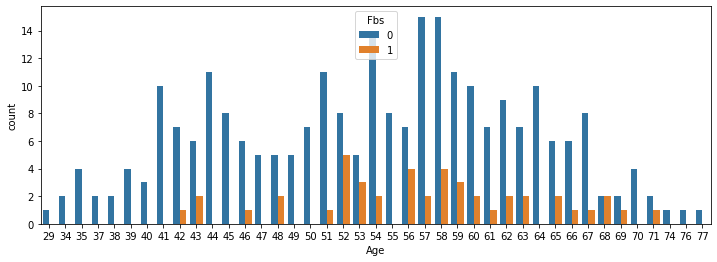

In [86]:
plt.figure(figsize=(12,4))
sns.countplot(x="Age", hue="Fbs", data=df)
plt.show()

**Maximum Heart Rate (MaxHR) Analysis**

/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



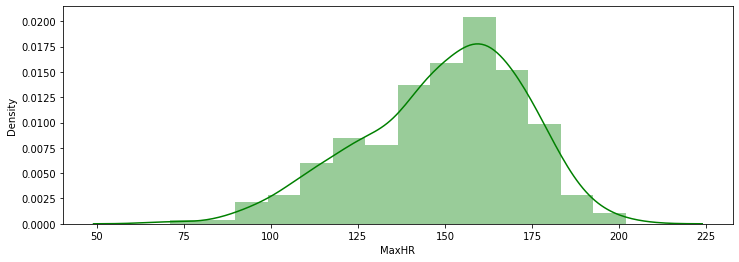

In [96]:
plt.figure(figsize=(12,4))
sns.distplot(df['MaxHR'], color='g')
plt.show()

In [97]:
avg_hr = df[["Age", "MaxHR"]].groupby(['Age'], as_index=False).mean()

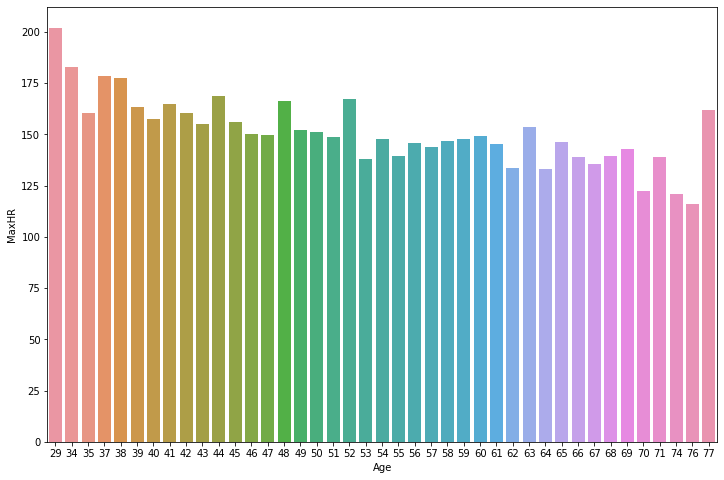

In [98]:
plt.figure(figsize=(12,8))
sns.barplot(x="Age", y="MaxHR", data=avg_hr)
plt.show()

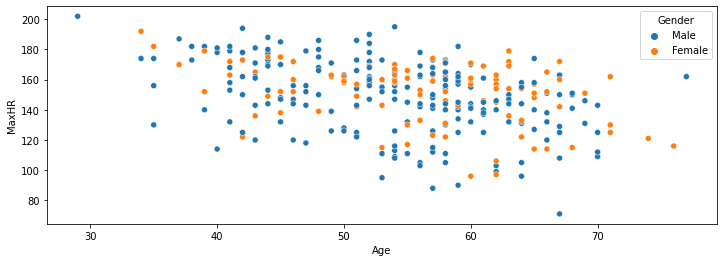

In [94]:
plt.figure(figsize=(12,4))
sns.scatterplot(x="Age", y="MaxHR", hue="Gender", data=df)
plt.show()

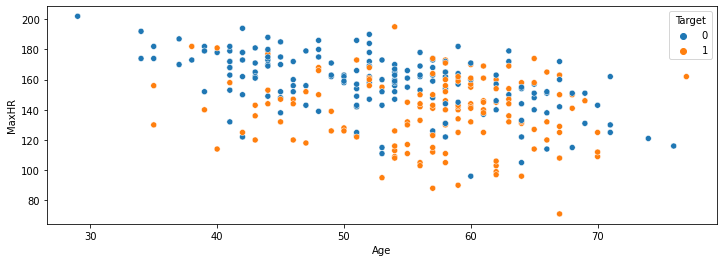

In [95]:
plt.figure(figsize=(12,4))
sns.scatterplot(x="Age", y="MaxHR", hue="Target", data=df)
plt.show()

**ExAng Analysis**

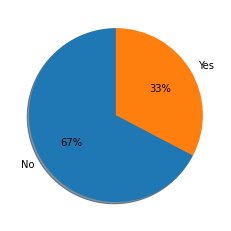

In [110]:
df['ExAng'].value_counts()/len(df)*100

ExerciseInducedAngina = ['No','Yes']
Percentage = [67.32,32.68]

plt.figure(1, figsize=(8,4))
plt.pie(Percentage, labels=ExerciseInducedAngina,
        autopct='%0.f%%', shadow=True, startangle=90)
plt.show()


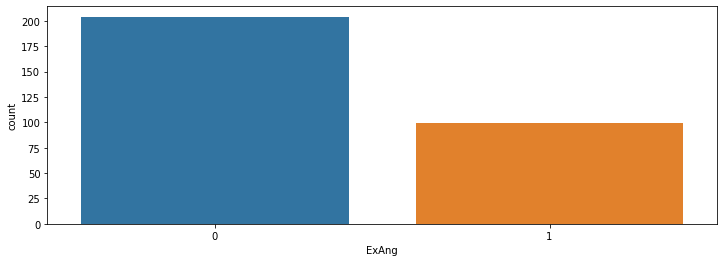

In [100]:
plt.figure(figsize=(12,4))
sns.countplot(x="ExAng", data=df)
plt.show()


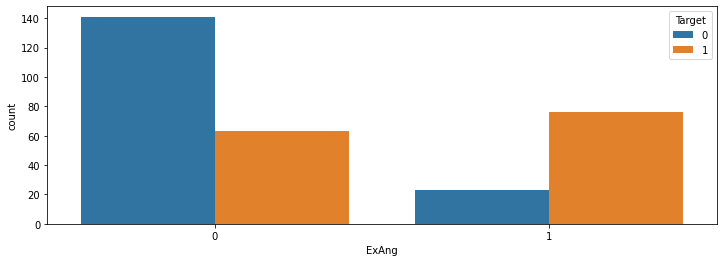

In [101]:
plt.figure(figsize=(12,4))
sns.countplot(x="ExAng", hue="Target", data=df)
plt.show()

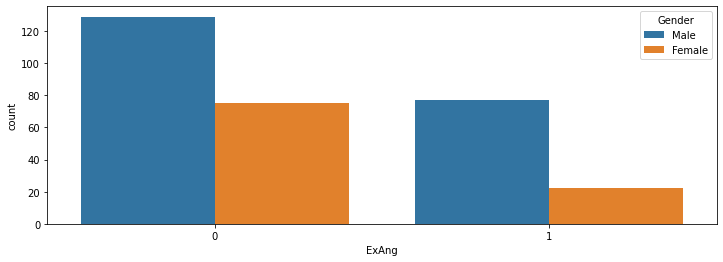

In [102]:
plt.figure(figsize=(12,4))
sns.countplot(x="ExAng", hue="Gender", data=df)
plt.show()

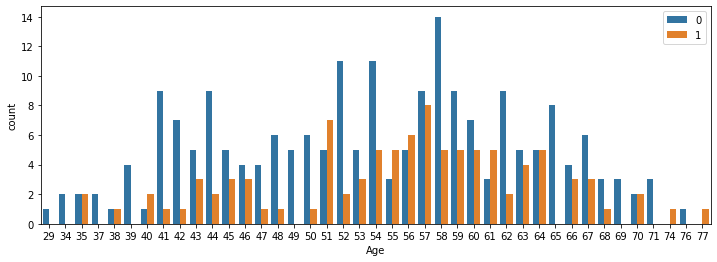

In [107]:
plt.figure(figsize=(12,4))
sns.countplot(x="Age", hue="ExAng", data=df)
plt.legend(loc='upper right')
plt.show()

**Oldpeak Analysis**

/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



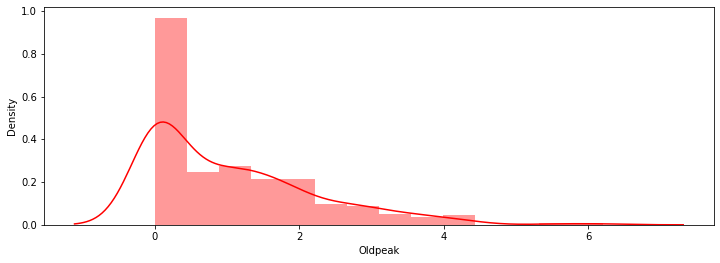

In [108]:
plt.figure(figsize=(12,4))
sns.distplot(df['Oldpeak'], color='r')
plt.show()

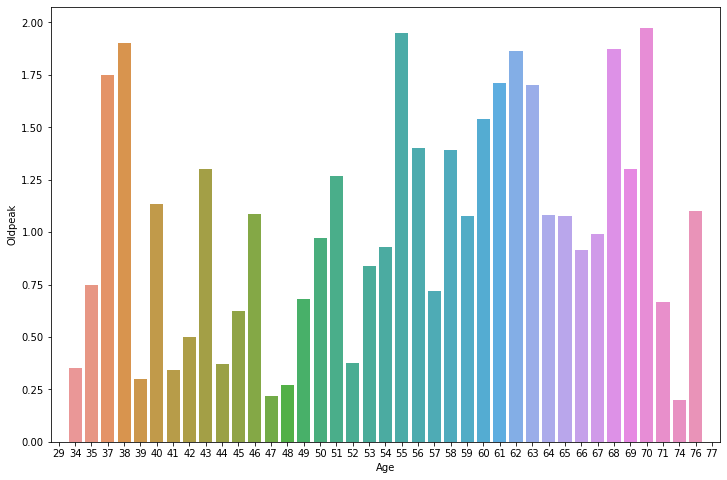

In [109]:
avg_op = df[["Age", "Oldpeak"]].groupby(['Age'], as_index=False).mean()

plt.figure(figsize=(12,8))
sns.barplot(x="Age", y="Oldpeak", data=avg_op)
plt.show()

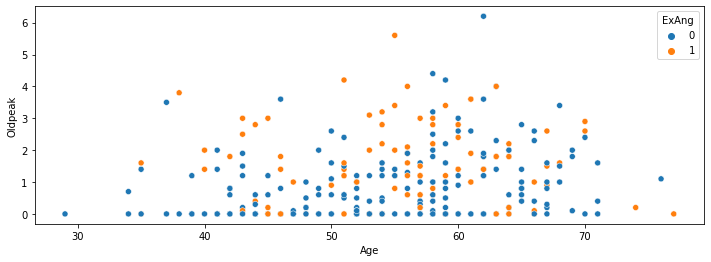

In [113]:
plt.figure(figsize=(12,4))
sns.scatterplot(x="Age", y="Oldpeak", hue="ExAng", data=df)
plt.show()

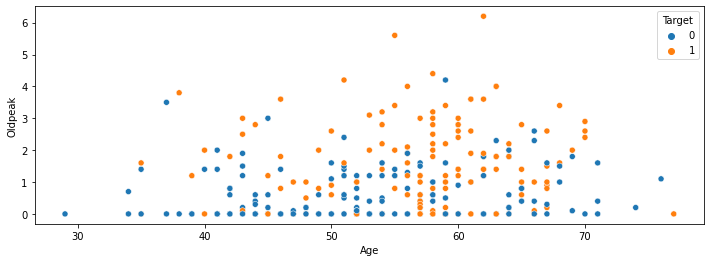

In [114]:
plt.figure(figsize=(12,4))
sns.scatterplot(x="Age", y="Oldpeak", hue="Target", data=df)
plt.show()

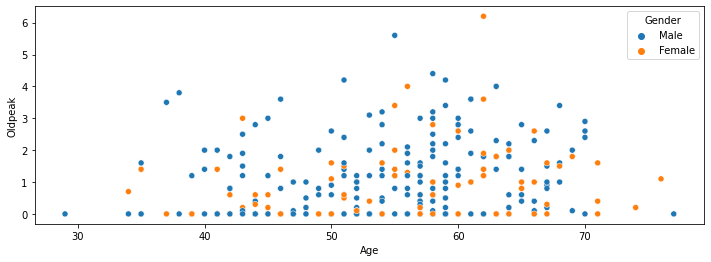

In [115]:
plt.figure(figsize=(12,4))
sns.scatterplot(x="Age", y="Oldpeak", hue="Gender", data=df)
plt.show()


**Slope Analysis**

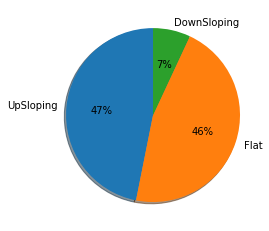

In [117]:
df['Slope'].value_counts()/len(df)*100

Slope = ['UpSloping','Flat','DownSloping']
Percentage = [46.86,46.20,6.94]

plt.figure(1, figsize=(8,4))
plt.pie(Percentage, labels=Slope,
        autopct='%0.f%%', shadow=True, startangle=90)
plt.show()

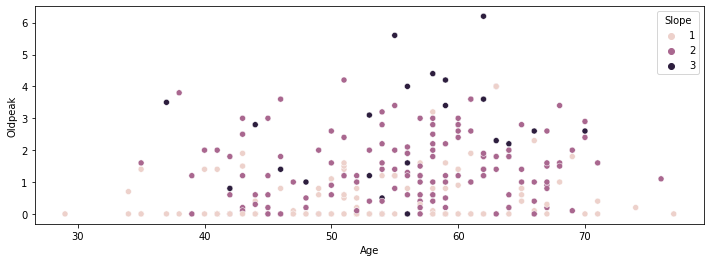

In [121]:
plt.figure(figsize=(12,4))
sns.scatterplot(x="Age", y="Oldpeak", hue="Slope", data=df)
plt.show()

**Ca (Number of major vessels colored by flourosopy) Analysis**

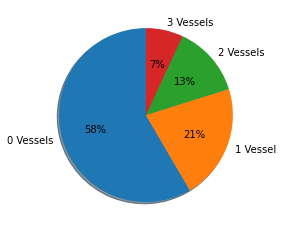

In [125]:
df['Ca'].value_counts()/len(df)*100

Ca = ['0 Vessels','1 Vessel', '2 Vessels','3 Vessels']
Percentage = [58.41,21.45,13.20,6.94]

plt.figure(1, figsize=(8,4))
plt.pie(Percentage, labels=Ca,
        autopct='%0.f%%', shadow=True, startangle=90)
plt.show()

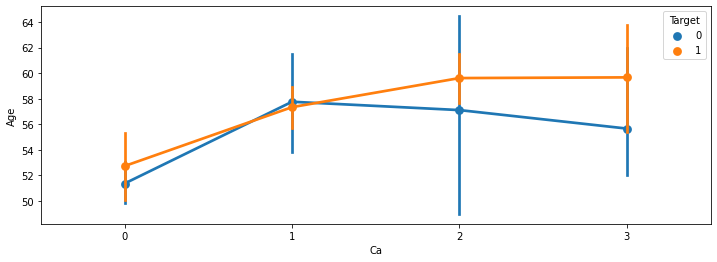

In [123]:
plt.figure(figsize=(12,4))
sns.pointplot(x="Ca", y="Age", hue="Target", data=df)
plt.show()

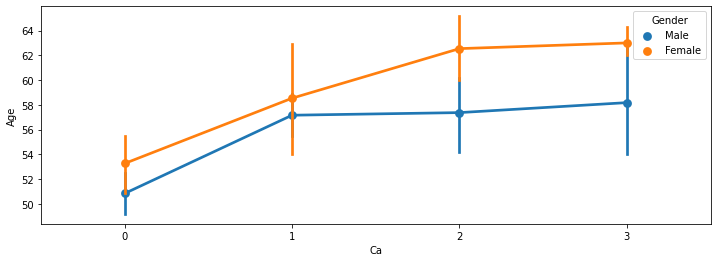

In [124]:
plt.figure(figsize=(12,4))
sns.pointplot(x="Ca", y="Age", hue="Gender", data=df)
plt.show()

**Thal Analysis**

In [128]:
df['Thal'].value_counts()/len(df)*100

normal        54.785479
reversable    38.613861
fixed          5.940594
Name: Thal, dtype: float64

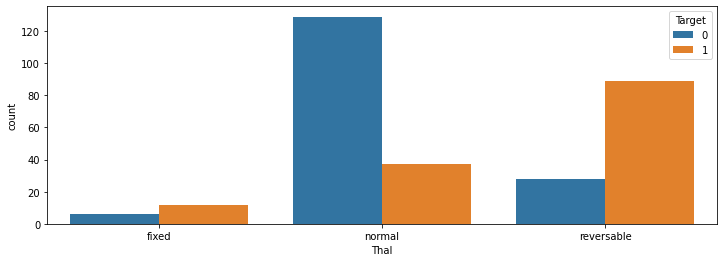

In [126]:
plt.figure(figsize=(12,4))
sns.countplot(x="Thal", hue="Target", data=df)
plt.show()

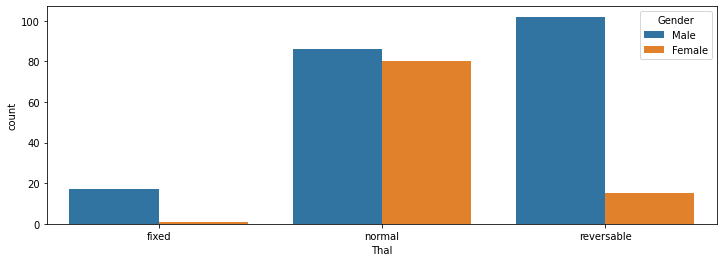

In [127]:
plt.figure(figsize=(12,4))
sns.countplot(x="Thal", hue="Gender", data=df)
plt.show()
